In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import scipy.stats as stats

print('Initialized')

Initialized


# Create Data Frames

In [2]:
apps = pd.read_csv('application_record.csv')
report = pd.read_csv('credit_record.csv')

apps.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
report.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Explore Report

In [4]:
(abs(report[['MONTHS_BALANCE', 'ID']].groupby('ID').min())).describe()

,MONTHS_BALANCE
count,45985.000000
mean,26.433489
std,16.481280
min,0.000000
25%,12.000000
50%,25.000000
75%,40.000000
max,60.000000


In [5]:
report['STATUS'] = report['STATUS'].replace({'0':'0-29', '1':'30-59', '2':'60-89', '3':'90-119', '4':'120-149', '5':'Bad Debt/Write Off', 'C':'Paid Off', 'X':'No Debt'})
report

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,No Debt
1,5001711,-1,0-29
2,5001711,-2,0-29
3,5001711,-3,0-29
4,5001712,0,Paid Off
...,...,...,...
1048570,5150487,-25,Paid Off
1048571,5150487,-26,Paid Off
1048572,5150487,-27,Paid Off
1048573,5150487,-28,Paid Off


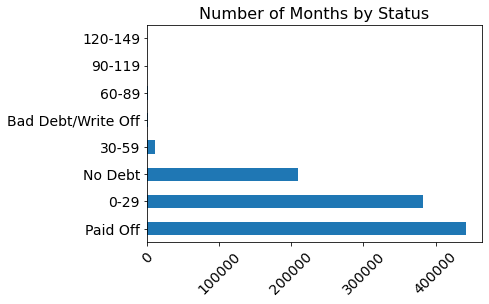

In [6]:
report['STATUS'].value_counts().plot(kind='barh')
plt.title('Number of Months by Status', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.show()

In [7]:
report.groupby(['ID', 'STATUS']).size().unstack(fill_value=0).describe()

STATUS,0-29,120-149,30-59,60-89,90-119,Bad Debt/Write Off,No Debt,Paid Off
count,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000
mean,8.331412,0.004849,0.241166,0.018876,0.006959,0.036816,4.549962,9.612504
std,8.234128,0.084188,0.990994,0.197607,0.101931,0.855981,9.622719,13.625156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.000000
max,61.000000,7.000000,38.000000,8.000000,8.000000,48.000000,61.000000,60.000000


In [8]:
report.groupby(['MONTHS_BALANCE', 'ID']).size()

MONTHS_BALANCE  ID     
-60             5001730    1
                5002160    1
                5002165    1
                5002171    1
                5002283    1
                          ..
 0              5150481    1
                5150483    1
                5150484    1
                5150485    1
                5150487    1
Length: 1048575, dtype: int64

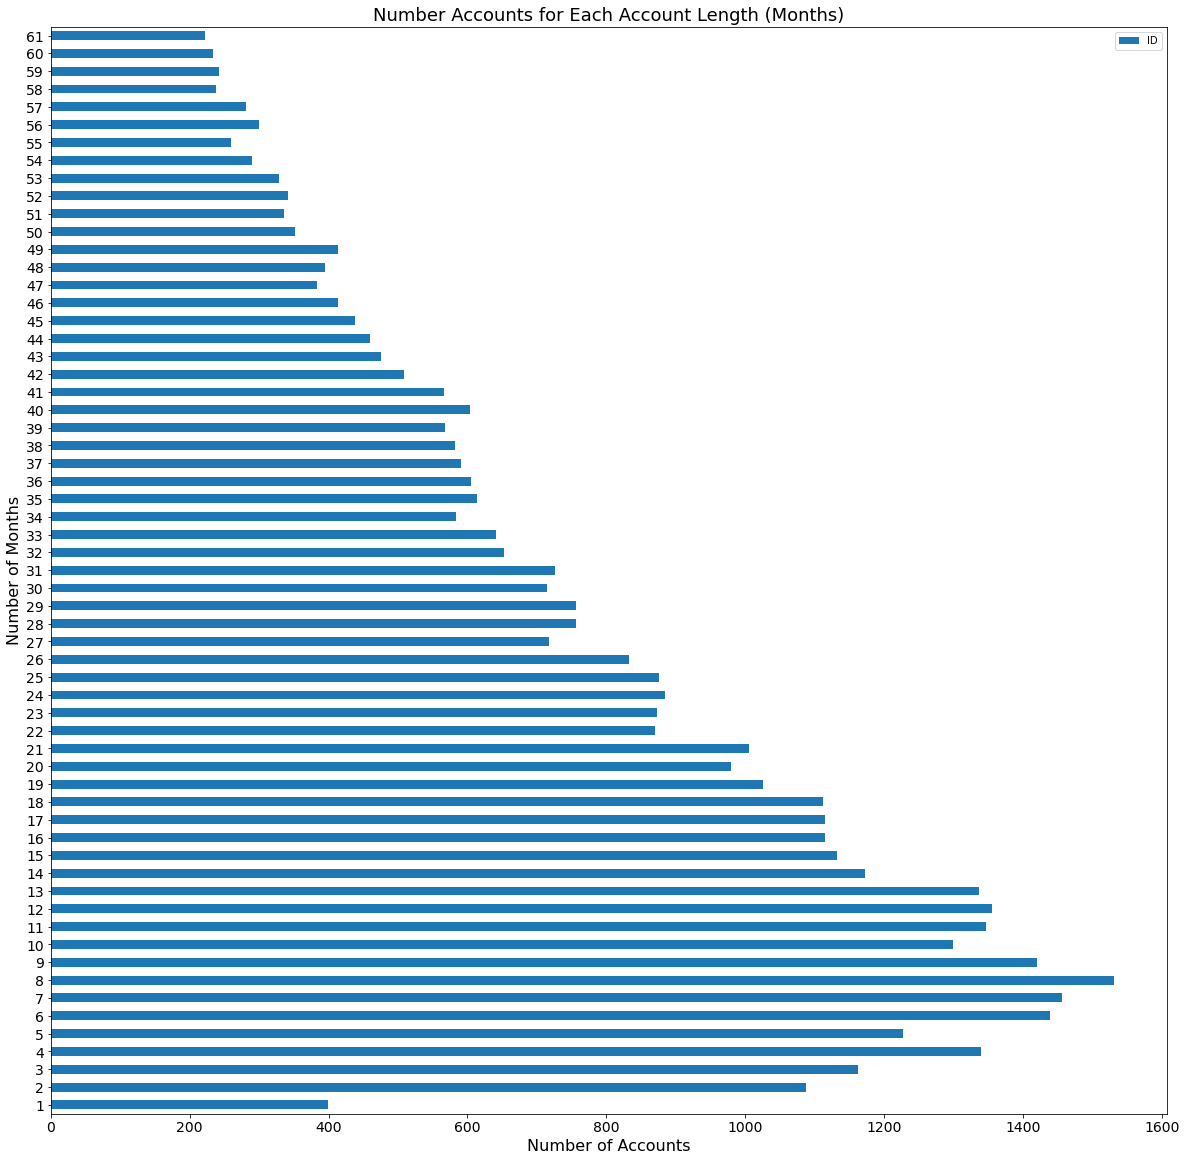

In [9]:
report[['MONTHS_BALANCE', 'ID']].groupby('ID').count().reset_index().groupby('MONTHS_BALANCE').count().plot(kind='barh', figsize=(20,20))
plt.title('Number Accounts for Each Account Length (Months)', fontsize=18)
plt.ylabel('Number of Months', fontsize = 16)
plt.xlabel('Number of Accounts', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [10]:
# number of months of active credit account for each ID 
months = report.groupby('ID').count().reset_index()
# pull only the columns we care about
months = months[['ID', 'MONTHS_BALANCE']]
# rename the columns
months.columns = ['ID', 'MONTHS_ACTIVE']
months

,ID,MONTHS_ACTIVE
0,5001711,4
1,5001712,19
2,5001713,22
3,5001714,15
4,5001715,60
...,...,...
45980,5150482,18
45981,5150483,18
45982,5150484,13
45983,5150485,2


In [11]:
# number of months of active credit account for each ID 
months = report.groupby('ID').count().reset_index()

# pull only the columns we care about
months = months[['ID', 'MONTHS_BALANCE']]

# rename the columns
months.columns = ['ID', 'MONTHS_ACTIVE']

# Number of times each ID had each status
expanded = report.groupby(['ID', 'STATUS']).size().unstack().reset_index()

# Merge the expanded data frame with the months data frame
expanded = expanded.merge(months, how='left', on='ID')

# fill all null values with 0 
expanded.fillna(0, inplace=True)

# rename the columns in a way that makes sense
expanded.columns = ['id', '0-29', '120-149', '30-59', '60-89', '90-119',
       'bad_debt', 'no_debt', 'paid_off', 'months_active']


In [12]:
# had at least 1 month of no_debt and at leasat 1 month of paid off debt
expanded[(expanded['no_debt'] >= 1) & (expanded['paid_off'] >= 1)]

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active
6,5001718,24.0,0.0,2.0,0.0,0.0,0.0,10.0,3.0,39
10,5001724,0.0,0.0,0.0,0.0,0.0,0.0,9.0,22.0,31
25,5001742,10.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,47
26,5001743,1.0,0.0,0.0,0.0,0.0,0.0,14.0,26.0,41
34,5001756,1.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,19
...,...,...,...,...,...,...,...,...,...,...
45950,5150412,9.0,0.0,2.0,0.0,0.0,0.0,2.0,5.0,18
45959,5150422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,26
45973,5150475,0.0,0.0,0.0,0.0,0.0,0.0,8.0,36.0,44
45976,5150478,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,14


In [13]:
# at least 20 months of no debt
expanded[expanded['no_debt'] >= 20]

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,22
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,60
9,5001723,8.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,31
17,5001732,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,36
36,5001758,24.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,47
...,...,...,...,...,...,...,...,...,...,...
45943,5150403,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,39
45944,5150405,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,49
45946,5150408,6.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,33
45965,5150460,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,39


In [14]:
# At least 20 months of active account at least 10 months of 0-29 late debt
expanded[(expanded['months_active'] >= 20) & (expanded['0-29'] >= 10)]

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active
5,5001717,17.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22
6,5001718,24.0,0.0,2.0,0.0,0.0,0.0,10.0,3.0,39
8,5001720,29.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,36
22,5001737,12.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,22
23,5001738,12.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,44
...,...,...,...,...,...,...,...,...,...,...
45957,5150420,12.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,30
45958,5150421,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,28
45972,5150473,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
45974,5150476,17.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,22


In [15]:
# No debt for at least 40 months
expanded[expanded['no_debt'] >= 40]

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,60
51,5001779,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,46
52,5001780,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,46
67,5001796,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,41
70,5001803,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,47
...,...,...,...,...,...,...,...,...,...,...
45886,5150245,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,47
45941,5150400,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,49
45942,5150401,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,49
45944,5150405,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,49


In [16]:
# create a range for the maxium number of months in the data frame
# use a for loop to put get the entire account's history to the current month by shifting status by n
for n in range(1, 62):
    report.columns = report.columns.str.lower()
    report[f'{str(n)}month_ago'] = report.groupby('id')['status'].shift(n)

# convert the months_balance column to positive number    
report['months_balance'] = report['months_balance']*-1

# get the max row for each id
full_history = report.groupby('id')[['months_balance']].max().reset_index()
# merge the full_history df with the report df (that has current history) so that each id only has 1 row
full_history = full_history.merge(report, how='left', on=['months_balance', 'id'])
# rename months_balance column to account_months for age
full_history.rename(columns={"months_balance": "account_months"}, inplace=True)
# print the df
full_history

,id,account_months,status,1month_ago,2month_ago,3month_ago,4month_ago,5month_ago,6month_ago,7month_ago,...,52month_ago,53month_ago,54month_ago,55month_ago,56month_ago,57month_ago,58month_ago,59month_ago,60month_ago,61month_ago
0,5001711,3,0-29,0-29,0-29,No Debt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001712,18,0-29,0-29,0-29,0-29,0-29,0-29,0-29,0-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001713,21,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001714,14,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001715,59,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,...,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,28,0-29,0-29,0-29,0-29,0-29,0-29,0-29,0-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45981,5150483,17,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,No Debt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45982,5150484,12,0-29,0-29,0-29,0-29,0-29,0-29,0-29,0-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45983,5150485,1,0-29,0-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
full_history['account_months'].max()

60

In [18]:
report

,id,months_balance,status,1month_ago,2month_ago,3month_ago,4month_ago,5month_ago,6month_ago,7month_ago,...,52month_ago,53month_ago,54month_ago,55month_ago,56month_ago,57month_ago,58month_ago,59month_ago,60month_ago,61month_ago
0,5001711,0,No Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001711,1,0-29,No Debt,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001711,2,0-29,0-29,No Debt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001711,3,0-29,0-29,0-29,No Debt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001712,0,Paid Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,25,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,5150487,26,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,5150487,27,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,5150487,28,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,Paid Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
expanded.columns

Index(['id', '0-29', '120-149', '30-59', '60-89', '90-119', 'bad_debt',
       'no_debt', 'paid_off', 'months_active'],
      dtype='object')

In [20]:
# copy the expanded dataframe
score = expanded.copy()
# multiple each lateness by n where n is cronological order of the lateness i.e. being 30-59days would be 2
# for paid off multiple by -2 
# the higher the score the more risk
score['30-59'] = score['30-59'] * 2
score['60-89'] = score['60-89'] * 3
score['90-119'] =  score['90-119'] * 4
score['120-149'] = score['120-149'] * 5
score['bad_debt'] = score['bad_debt'] * 6
score['paid_off'] = score['paid_off'] * -2
# convert the id to string
score['id'] = score['id'].astype(str)
# Create a score value for months active - less than 18 = 0 les than 47 > 18 = -10 & > 47 = -20
score['time_score'] = np.where(score['months_active'] < 18, 0, np.where(score['months_active'] < 47, -10, -20))
# sum the values on the row level
score['score'] = score.sum(axis=1)
score

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active,time_score,score
0,5001711,3.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,4,0,8.0
1,5001712,10.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.0,19,-10,1.0
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,22.0,-0.0,22,-10,34.0
3,5001714,0.0,0.0,0.0,0.0,0.0,0.0,15.0,-0.0,15,0,30.0
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,60.0,-0.0,60,-20,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,18,-10,8.0
45981,5150483,0.0,0.0,0.0,0.0,0.0,0.0,18.0,-0.0,18,-10,26.0
45982,5150484,12.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,13,0,23.0
45983,5150485,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,2,0,4.0


In [21]:
# Not null values for reports data frame with 60 months of history per row
report.shape[0] - (report.isnull().sum())

id                1048575
months_balance    1048575
status            1048575
1month_ago        1002590
2month_ago         957004
                   ...   
57month_ago          2312
58month_ago          1376
59month_ago           678
60month_ago           222
61month_ago             0
Length: 64, dtype: int64

In [22]:
expanded.describe()

,id,0-29,120-149,30-59,60-89,90-119,bad_debt,no_debt,paid_off,months_active
count,4.598500e+04,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000
mean,5.070164e+06,8.331412,0.004849,0.241166,0.018876,0.006959,0.036816,4.549962,9.612504,22.802544
std,4.543364e+04,8.234128,0.084188,0.990994,0.197607,0.101931,0.855981,9.622719,13.625156,15.492771
min,5.001711e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.026147e+06,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,5.065737e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000
75%,5.114024e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.000000,34.000000
max,5.150487e+06,61.000000,7.000000,38.000000,8.000000,8.000000,48.000000,61.000000,60.000000,61.000000


# Explore Apps

In [23]:
apps.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [24]:
columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE']

for col in columns:
    print(f"{col} Counts")
    print(apps[col].value_counts())
    print('\n')

CODE_GENDER Counts
F    294440
M    144117
Name: CODE_GENDER, dtype: int64


FLAG_OWN_CAR Counts
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


FLAG_OWN_REALTY Counts
Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64


CNT_CHILDREN Counts
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64


NAME_INCOME_TYPE Counts
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


NAME_EDUCATION_TYPE Counts
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


NAME_FAMILY_STATUS Counts
Married                 299828
Sing

In [25]:
apps.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [26]:
apps[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'].isnull())]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [27]:
apps.loc[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'].notnull()), 'OCCUPATION_TYPE'] = 'Other'

In [28]:
apps['OCCUPATION_TYPE'].fillna('Other', inplace=True)

In [29]:
apps[['OCCUPATION_TYPE', 'DAYS_EMPLOYED', 'NAME_INCOME_TYPE']].groupby(['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']).agg('mean')

DAYS_EMPLOYED
OCCUPATION_TYPE      NAME_INCOME_TYPE                   
Accountants          Commercial associate   -2326.339191
                     Pensioner              -1337.000000
                     State servant          -3492.510744
                     Working                -2591.955760
Cleaning staff       Commercial associate   -2291.509370
...                                                  ...
Security staff       State servant          -2745.607143
                     Working                -2068.631986
Waiters/barmen staff Commercial associate   -2187.288462
                     State servant          -1856.600000
                     Working                -2170.291866

[73 rows x 1 columns]

In [30]:
len(apps['ID'].unique())

438510

In [31]:
len(report['id'].unique())

45985

In [32]:
(apps['DAYS_BIRTH']/365 * -1).apply(np.floor)

0         32.0
1         32.0
2         58.0
3         52.0
4         52.0
          ... 
438552    62.0
438553    43.0
438554    22.0
438555    59.0
438556    51.0
Name: DAYS_BIRTH, Length: 438557, dtype: float64

In [33]:
(apps.columns).str.lower()

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members'],
      dtype='object')

In [34]:
apps.replace({'Y':1, 'N':0}, inplace=True)

In [35]:
apps['FLAG_EMAIL']

0         0
1         0
2         0
3         1
4         1
         ..
438552    0
438553    0
438554    0
438555    0
438556    0
Name: FLAG_EMAIL, Length: 438557, dtype: int64

In [36]:
apps.columns = (apps.columns).str.lower()

In [37]:
apps

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Other,1.0
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Other,2.0


In [38]:
#dummies = ['occupation_type', 'name_housing_type', 'name_family_status', 'name_education_type', 'name_income_type'] 
dummies = pd.get_dummies(apps[['occupation_type', 'name_housing_type', 'name_family_status', 'name_education_type', 'name_income_type']])
dummies

,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,...,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_income_type_Commercial associate,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Working
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
438553,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
438554,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
438555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [39]:
apps

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Other,1.0
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Other,2.0
